In [79]:
%load_ext autoreload
%autoreload 2

from parse import get_data_matrix, get_data_averages, get_data_IUFs
import matplotlib.pyplot as plt
import numpy as np
import train_test
import recommend
import contextlib
import io

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
movie_average_rating = get_data_averages('train.txt')
no_ratings = list(map(lambda x: x+1, np.where(np.array(movie_average_rating) == None)))
print(f"Movies with no ratings: {no_ratings}")

Movies with no ratings: [array([777, 793, 899, 911, 967, 987])]


[]

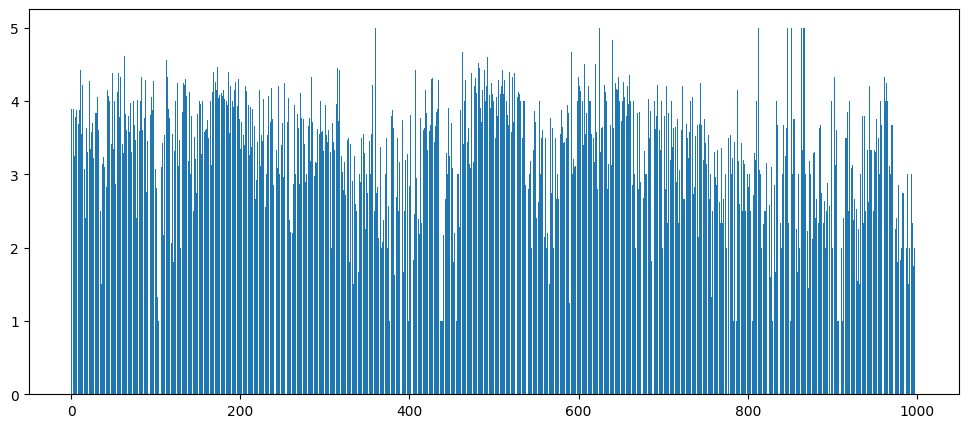

In [81]:
plt.figure(figsize=(12, 5))
plt.bar(range(1000), height=list(map(lambda x: x if x else 0, movie_average_rating)))
plt.plot()

In [82]:
IUFs = get_data_IUFs('train.txt')
print(IUFs)

[np.float64(1.340075441597622), np.float64(3.5563933485243853), np.float64(3.736965594166206), np.float64(2.888968687611256), np.float64(4.058893689053568), np.float64(4.473931188332412), np.float64(1.340075441597622), np.float64(2.5145731728297585), np.float64(1.9434164716336326), np.float64(3.9434164716336326), np.float64(2.2515387669959646), np.float64(2.15200309344505), np.float64(2.1844245711374275), np.float64(2.643856189774725), np.float64(1.8365012677171206), np.float64(5.321928094887363), np.float64(3.9434164716336326), np.float64(5.321928094887363), np.float64(4.184424571137428), np.float64(3.9434164716336326), np.float64(3.395928676331139), np.float64(2.15200309344505), np.float64(2.7858751946471525), np.float64(2.643856189774725), np.float64(1.5777669993169523), np.float64(4.321928094887363), np.float64(4.473931188332412), np.float64(2.1844245711374275), np.float64(3.5563933485243853), np.float64(5.058893689053568), np.float64(3.0), np.float64(3.321928094887362), np.float64

In [83]:
# train_test.generate_train_test_split("train.txt", [(10,15), (25,30), (50,55) ,(95,100), (125,130), (145,150), (175,180)])

In [84]:
# with contextlib.redirect_stdout(io.StringIO()):
#   res5 = []
#   res10 = []
#   res20 = []
#   for K in [5, 15, 25, 30, 35, 45, 50]:
#     mae5, mae10, mae20 = train_test.train_test(recommend.v1, K=K)
#     res5.append(mae5)
#     res10.append(mae10)
#     res20.append(mae20)

# res5 = list(map(lambda x: round(float(x), 3), res5))
# res10 = list(map(lambda x: round(float(x), 3), res10))
# res20 = list(map(lambda x: round(float(x), 3), res20))

# print(res5)
# print(res10)
# print(res20)

In [85]:
# with contextlib.redirect_stdout(io.StringIO()):
#   res5 = []
#   res10 = []
#   res20 = []
#   for K in [5, 15, 25, 30, 35, 45, 50]:
#     mae5, mae10, mae20 = train_test.train_test(recommend.v2, K=K)
#     res5.append(mae5)
#     res10.append(mae10)
#     res20.append(mae20)

# res5 = list(map(lambda x: round(float(x), 3), res5))
# res10 = list(map(lambda x: round(float(x), 3), res10))
# res20 = list(map(lambda x: round(float(x), 3), res20))

# print(res5)
# print(res10)
# print(res20)

In [86]:
# with contextlib.redirect_stdout(io.StringIO()):
#   res5 = []
#   res10 = []
#   res20 = []
#   for K in [5, 15, 25, 30, 35, 45, 50]:
#     mae5, mae10, mae20 = train_test.train_test(recommend.v3, K=K)
#     res5.append(mae5)
#     res10.append(mae10)
#     res20.append(mae20)

# res5 = list(map(lambda x: round(float(x), 3), res5))
# res10 = list(map(lambda x: round(float(x), 3), res10))
# res20 = list(map(lambda x: round(float(x), 3), res20))

# print(res5)
# print(res10)
# print(res20)

In [87]:
with contextlib.redirect_stdout(io.StringIO()):
  res5 = []
  res10 = []
  res20 = []
  for K in [15, 30]:
    mae5, mae10, mae20 = train_test.train_test(recommend.v4, K=K)
    res5.append(mae5)
    res10.append(mae10)
    res20.append(mae20)

res5 = list(map(lambda x: round(float(x), 3), res5))
res10 = list(map(lambda x: round(float(x), 3), res10))
res20 = list(map(lambda x: round(float(x), 3), res20))

print(res5)
print(res10)
print(res20)

[0.957, 0.957]
[0.927, 0.925]
[0.891, 0.891]
